In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Creating a resultant dataset by combining all the three samples from a subject and finding its average

In [62]:
for i in range(1,420):
    
    try:
        csv_file1 = str(i)+'_1.csv'
        csv_file2 = str(i)+'_2.csv'
        csv_file3 = str(i)+'_3.csv'
        
        #change this file_txt directory to where the txt files are saved
        file_csv1 = pd.read_csv(os.path.join('F:/jupyter/project/sample/csv/',csv_file1))
        file_csv2 = pd.read_csv(os.path.join('F:/jupyter/project/sample/csv/',csv_file2))
        file_csv3 = pd.read_csv(os.path.join('F:/jupyter/project/sample/csv/',csv_file3))
        
        temp1 = sum([file_csv1['ppg_output'],file_csv2['ppg_output'],file_csv3['ppg_output']])
        mean_signal = temp1/3
        
        directory = 'F:/jupyter/project/sample/patient/'
        f_name = str(i) + '.csv'
        dest_path = os.path.join(directory,f_name)
        file = open(dest_path,'w')
        file.write('resultant\n')
        for val in mean_signal:
            file.write(str(val)+'\n')
        file.close()
    
    except: pass


## Uploading the known datas to a pandas dataframe

In [63]:
directory = 'F:/jupyter/Project/'
f_name = 'patient_sample.xlsx'
df = pd.read_excel(os.path.join(directory,f_name))
df.head()

,num,subjectID,sex,age,height,weight,systole_bp,diastole_bp,bpm,bmi
0,1,2,Female,45,152,63,161,89,97,27.268006
1,2,3,Female,50,157,50,160,93,76,20.284799
2,3,6,Female,47,150,47,101,71,79,20.888889
3,4,8,Male,45,172,65,136,93,87,21.971336
4,5,9,Female,46,155,65,123,73,73,27.055151


## Calculating the mean and standard deviation for the Datasets

In [64]:
mean = []
standard_deviation = []

for sample_id in df['subjectID']:
    
    #directory of the .csv file
    directory = 'F:/jupyter/project/sample/patient/'
    f_name = str(sample_id) + '.csv'
    
    file_path = os.path.join(directory,f_name)
    temp_frame = pd.read_csv(file_path)
    
    mean.append(temp_frame['resultant'].mean())
    standard_deviation.append(temp_frame['resultant'].std())
    
mean = np.array(mean)
standard_deviation = np.array(standard_deviation)

df['mean'] = mean
df['std_dev'] = standard_deviation

df.head()

,num,subjectID,sex,age,height,weight,systole_bp,diastole_bp,bpm,bmi,mean,std_dev
0,1,2,Female,45,152,63,161,89,97,27.268006,2038.692381,158.415284
1,2,3,Female,50,157,50,160,93,76,20.284799,2004.373968,42.645841
2,3,6,Female,47,150,47,101,71,79,20.888889,2013.143492,54.882139
3,4,8,Male,45,172,65,136,93,87,21.971336,2023.992222,34.769358
4,5,9,Female,46,155,65,123,73,73,27.055151,2011.915079,21.271355


## Calculating kurtosis

In [65]:
from scipy.stats import kurtosis
kurt = []
for sample_id in df['subjectID']:
    
    #directory of the csv file folder
    directory = 'F:/jupyter/project/sample/patient/'
    f_name = str(sample_id) + '.csv'
    
    file_path = os.path.join(directory,f_name)
    temp_frame = pd.read_csv(file_path)
    
    kurtosis_val = kurtosis(temp_frame['resultant'])
    kurt.append(kurtosis_val)
    
kurt = np.array(kurt)

df['kurtosis'] = kurt

df.head()

,num,subjectID,sex,age,height,weight,systole_bp,diastole_bp,bpm,bmi,mean,std_dev,kurtosis
0,1,2,Female,45,152,63,161,89,97,27.268006,2038.692381,158.415284,-0.887848
1,2,3,Female,50,157,50,160,93,76,20.284799,2004.373968,42.645841,-1.237209
2,3,6,Female,47,150,47,101,71,79,20.888889,2013.143492,54.882139,-1.362531
3,4,8,Male,45,172,65,136,93,87,21.971336,2023.992222,34.769358,-0.971137
4,5,9,Female,46,155,65,123,73,73,27.055151,2011.915079,21.271355,0.075889


## Calculating rms

In [66]:
rms = []
for sample_id in df['subjectID']:
    
    #path to the .csv file folder
    directory = 'F:/jupyter/project/sample/patient/'
    f_name = str(sample_id) + '.csv'
    
    file_path = os.path.join(directory,f_name)
    temp_frame = pd.read_csv(file_path)
    
    #calculation for rms
    rms.append(np.sqrt(np.mean(temp_frame['resultant']**2)))

df['rms'] = np.array(rms)

df.head()

,num,subjectID,sex,age,height,weight,systole_bp,diastole_bp,bpm,bmi,mean,std_dev,kurtosis,rms
0,1,2,Female,45,152,63,161,89,97,27.268006,2038.692381,158.415284,-0.887848,2044.834975
1,2,3,Female,50,157,50,160,93,76,20.284799,2004.373968,42.645841,-1.237209,2004.827376
2,3,6,Female,47,150,47,101,71,79,20.888889,2013.143492,54.882139,-1.362531,2013.891093
3,4,8,Male,45,172,65,136,93,87,21.971336,2023.992222,34.769358,-0.971137,2024.290702
4,5,9,Female,46,155,65,123,73,73,27.055151,2011.915079,21.271355,0.075889,2012.027470


## ploting all the possible deviation of the values based on the Sex(Male/Female)

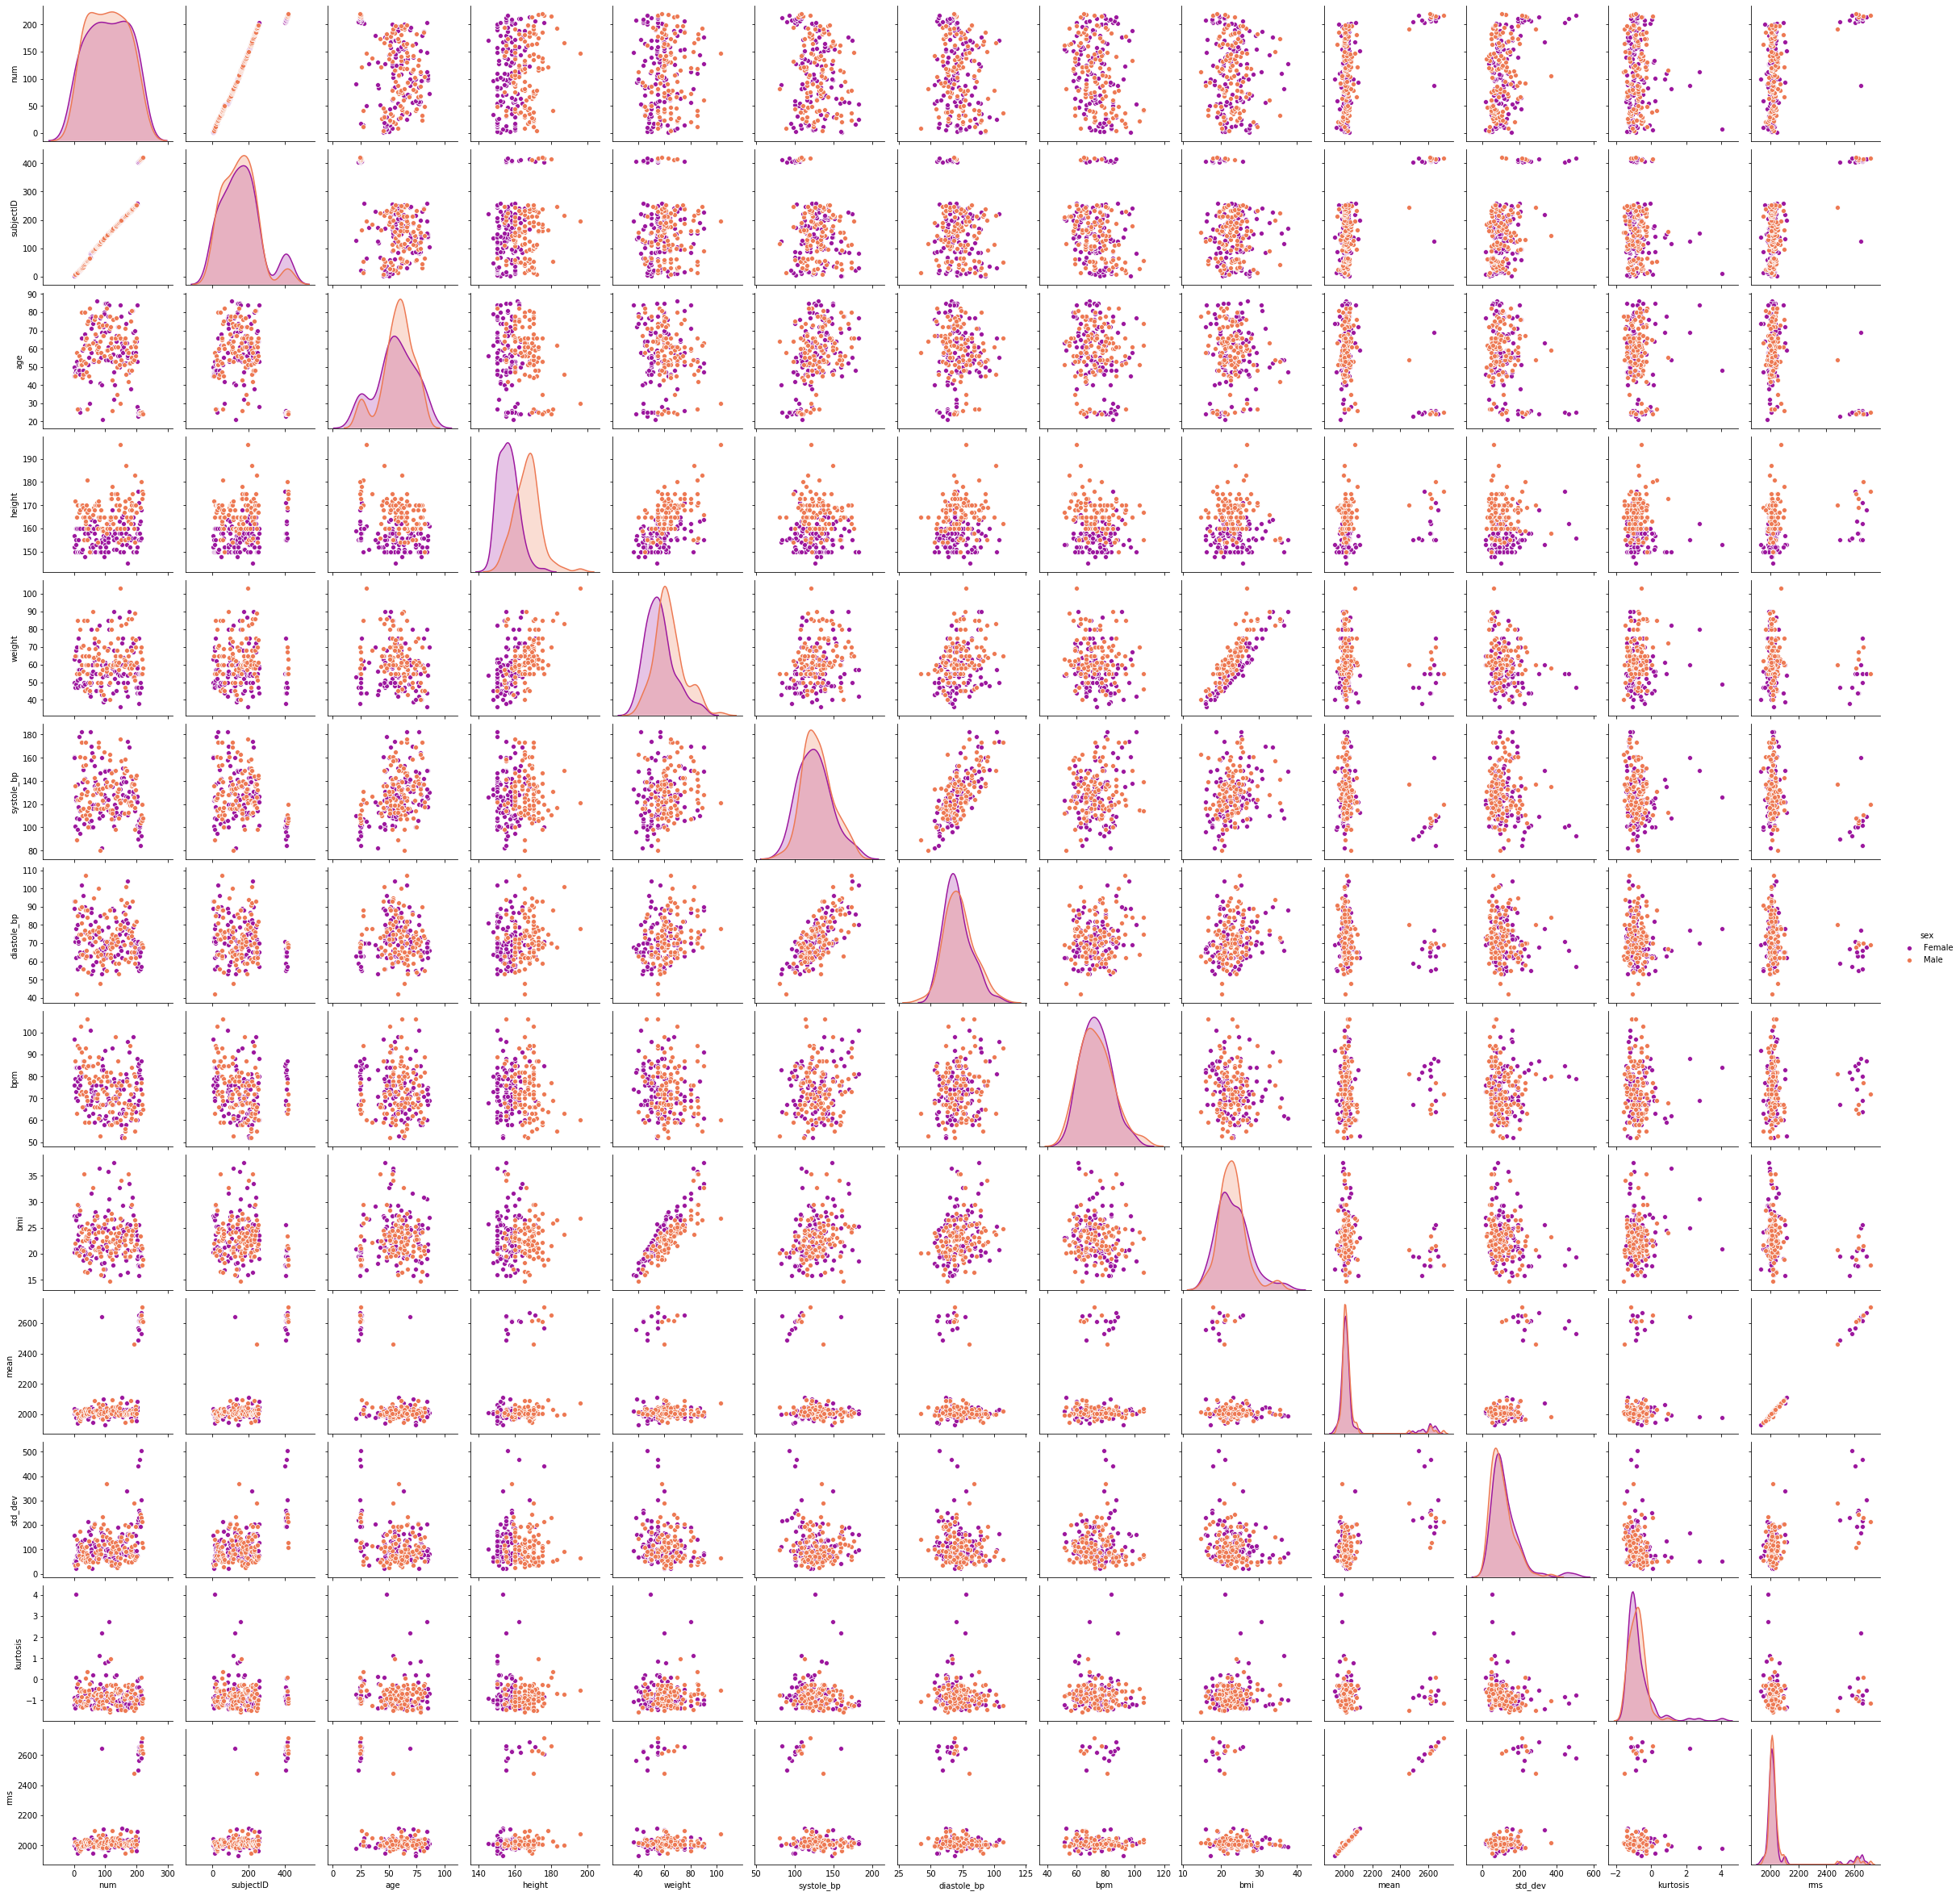

In [67]:
sns.pairplot(df,hue='sex',palette='plasma',kind='')

## Distribution of Mean

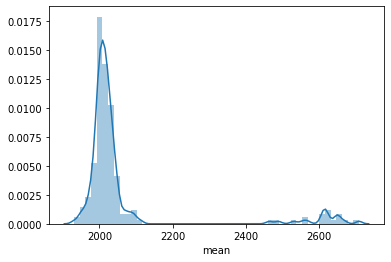

In [68]:
sns.distplot(df['mean'])

## Distribution of Standard Deviation

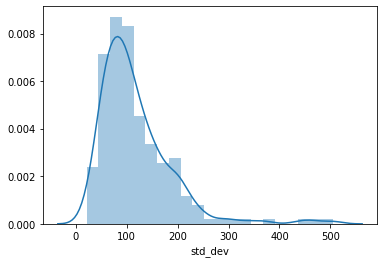

In [70]:
sns.distplot(df['std_dev'])

## Distribution of Kurtosis

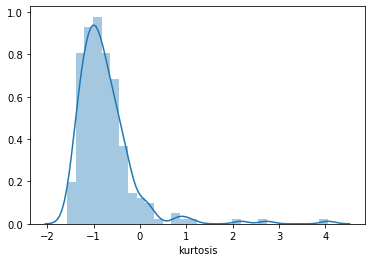

In [40]:
sns.distplot(df['kurtosis'])

## Distribution of RMS

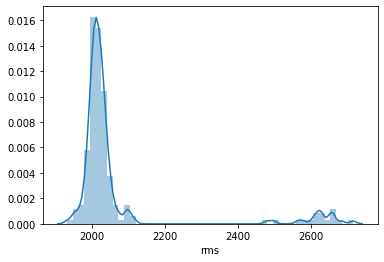

In [71]:
sns.distplot(df['rms'])

## mean vs kurtosis kde plot

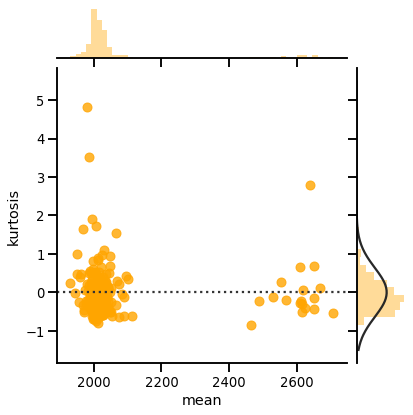

In [134]:
sns.set_context(context='talk',font_scale=.8)
sns.jointplot(x='mean',y='kurtosis',data=df,kind='resid',color='orange')

## Age vs SD

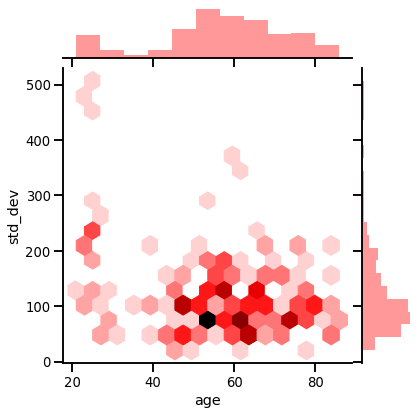

In [135]:
sns.jointplot(x='age',y='std_dev',data=df,kind='hex',color='red')

## age vs standard Deviation

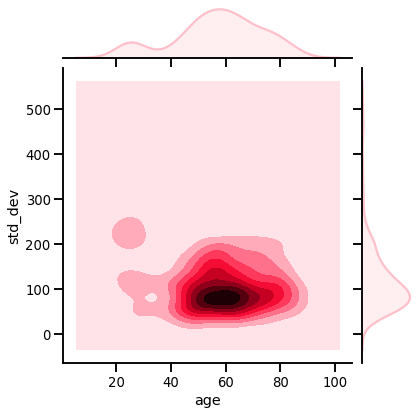

In [139]:
sns.jointplot(x='age',y='std_dev',data=df,kind='kde',color='pink')

## To save the data in csv format

In [140]:
df.to_csv('feature-extraction-for-individual-patient.csv',encoding='UTF-8',index=False)